<a href="https://colab.research.google.com/github/sid-42-d/Exploratory-Data-Analysis-and-Feature-Engineeirng/blob/main/blackFridaySales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
##Black Friday DataSet EDA and Feature Engineering
##Cleaning and preparing the data for model training

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
##Importing the dataset
df_train=pd.read_csv("/content/drive/MyDrive/train_blackFriday.csv")
df_test=pd.read_csv("/content/drive/MyDrive/test_blackFriday.csv")

In [172]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [173]:
df_train.shape

(550068, 12)

In [174]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [177]:
df_train.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [178]:
df_train.groupby(['Gender', 'Age', 'Occupation', 'City_Category','Purchase']).size().reset_index()

,Gender,Age,Occupation,City_Category,Purchase,0
0,F,0-17,0,A,50,1
1,F,0-17,0,A,2849,1
2,F,0-17,0,A,3580,1
3,F,0-17,0,A,3740,1
4,F,0-17,0,A,5210,1
...,...,...,...,...,...,...
454768,M,55+,20,C,20301,1
454769,M,55+,20,C,20372,1
454770,M,55+,20,C,20472,1
454771,M,55+,20,C,20566,1


In [179]:
##Always combine the train ana test dataset .
final_df=pd.concat([df_test,df_train])
final_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [180]:
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [181]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [182]:
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [183]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [184]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [185]:
##Will convert the categorical feature Gender into numerical
final_df['Gender']=final_df['Gender'].map({'F':0,'M':1})
final_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365.0


In [186]:
final_df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [187]:
##Handle categorical feature age
final_df['Age']=final_df['Age'].map({ '0-17':1,'18-25':2,'26-35':3, '36-45':4,'46-50':5,  '51-55':6, '55+':7})

In [188]:
final_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,B,1,1,20,NaN,NaN,368.0
550064,P00375436,0,3,1,C,3,0,20,NaN,NaN,371.0
550065,P00375436,0,3,15,B,4+,1,20,NaN,NaN,137.0
550066,P00375436,0,7,1,C,2,0,20,NaN,NaN,365.0


In [189]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 71.7+ MB


In [190]:
df_city=pd.get_dummies(final_df['City_Category'], drop_first=True,dtype=int)


In [191]:
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [192]:
final_df=pd.concat([final_df,df_city],axis=1)

In [193]:
final_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,B,1,1,20,NaN,NaN,368.0,1,0
550064,P00375436,0,3,1,C,3,0,20,NaN,NaN,371.0,0,1
550065,P00375436,0,3,15,B,4+,1,20,NaN,NaN,137.0,1,0
550066,P00375436,0,7,1,C,2,0,20,NaN,NaN,365.0,0,1


In [194]:
##We are dropping this as we already have two category and in total we have 3 so no need to keep the third one.
final_df.drop('City_Category',axis=1,inplace=True)

In [195]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [196]:
final_df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [197]:
##Focus on replacing missing values
final_df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [198]:
final_df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [199]:
final_df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [200]:
##Replace the missing value with mode
final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2']).mode()[0]

In [201]:
final_df['Product_Category_2'].isnull().sum()

np.int64(0)

In [202]:
final_df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,545809
Purchase,233599


In [203]:
##Replacing null values of Product_Category_3
final_df['Product_Category_3'].mode()[0]

np.float64(16.0)

In [204]:
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3']).mode()[0]

In [205]:
final_df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,233599


In [206]:
final_df.shape

(783667, 12)

In [207]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [208]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(str).str.replace('+','',regex=False)

In [209]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,8.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,8.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,8.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,8.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,8.0,16.0,NaN,0,1


In [210]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [211]:
##Converting the objest into integers
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(int)

In [212]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


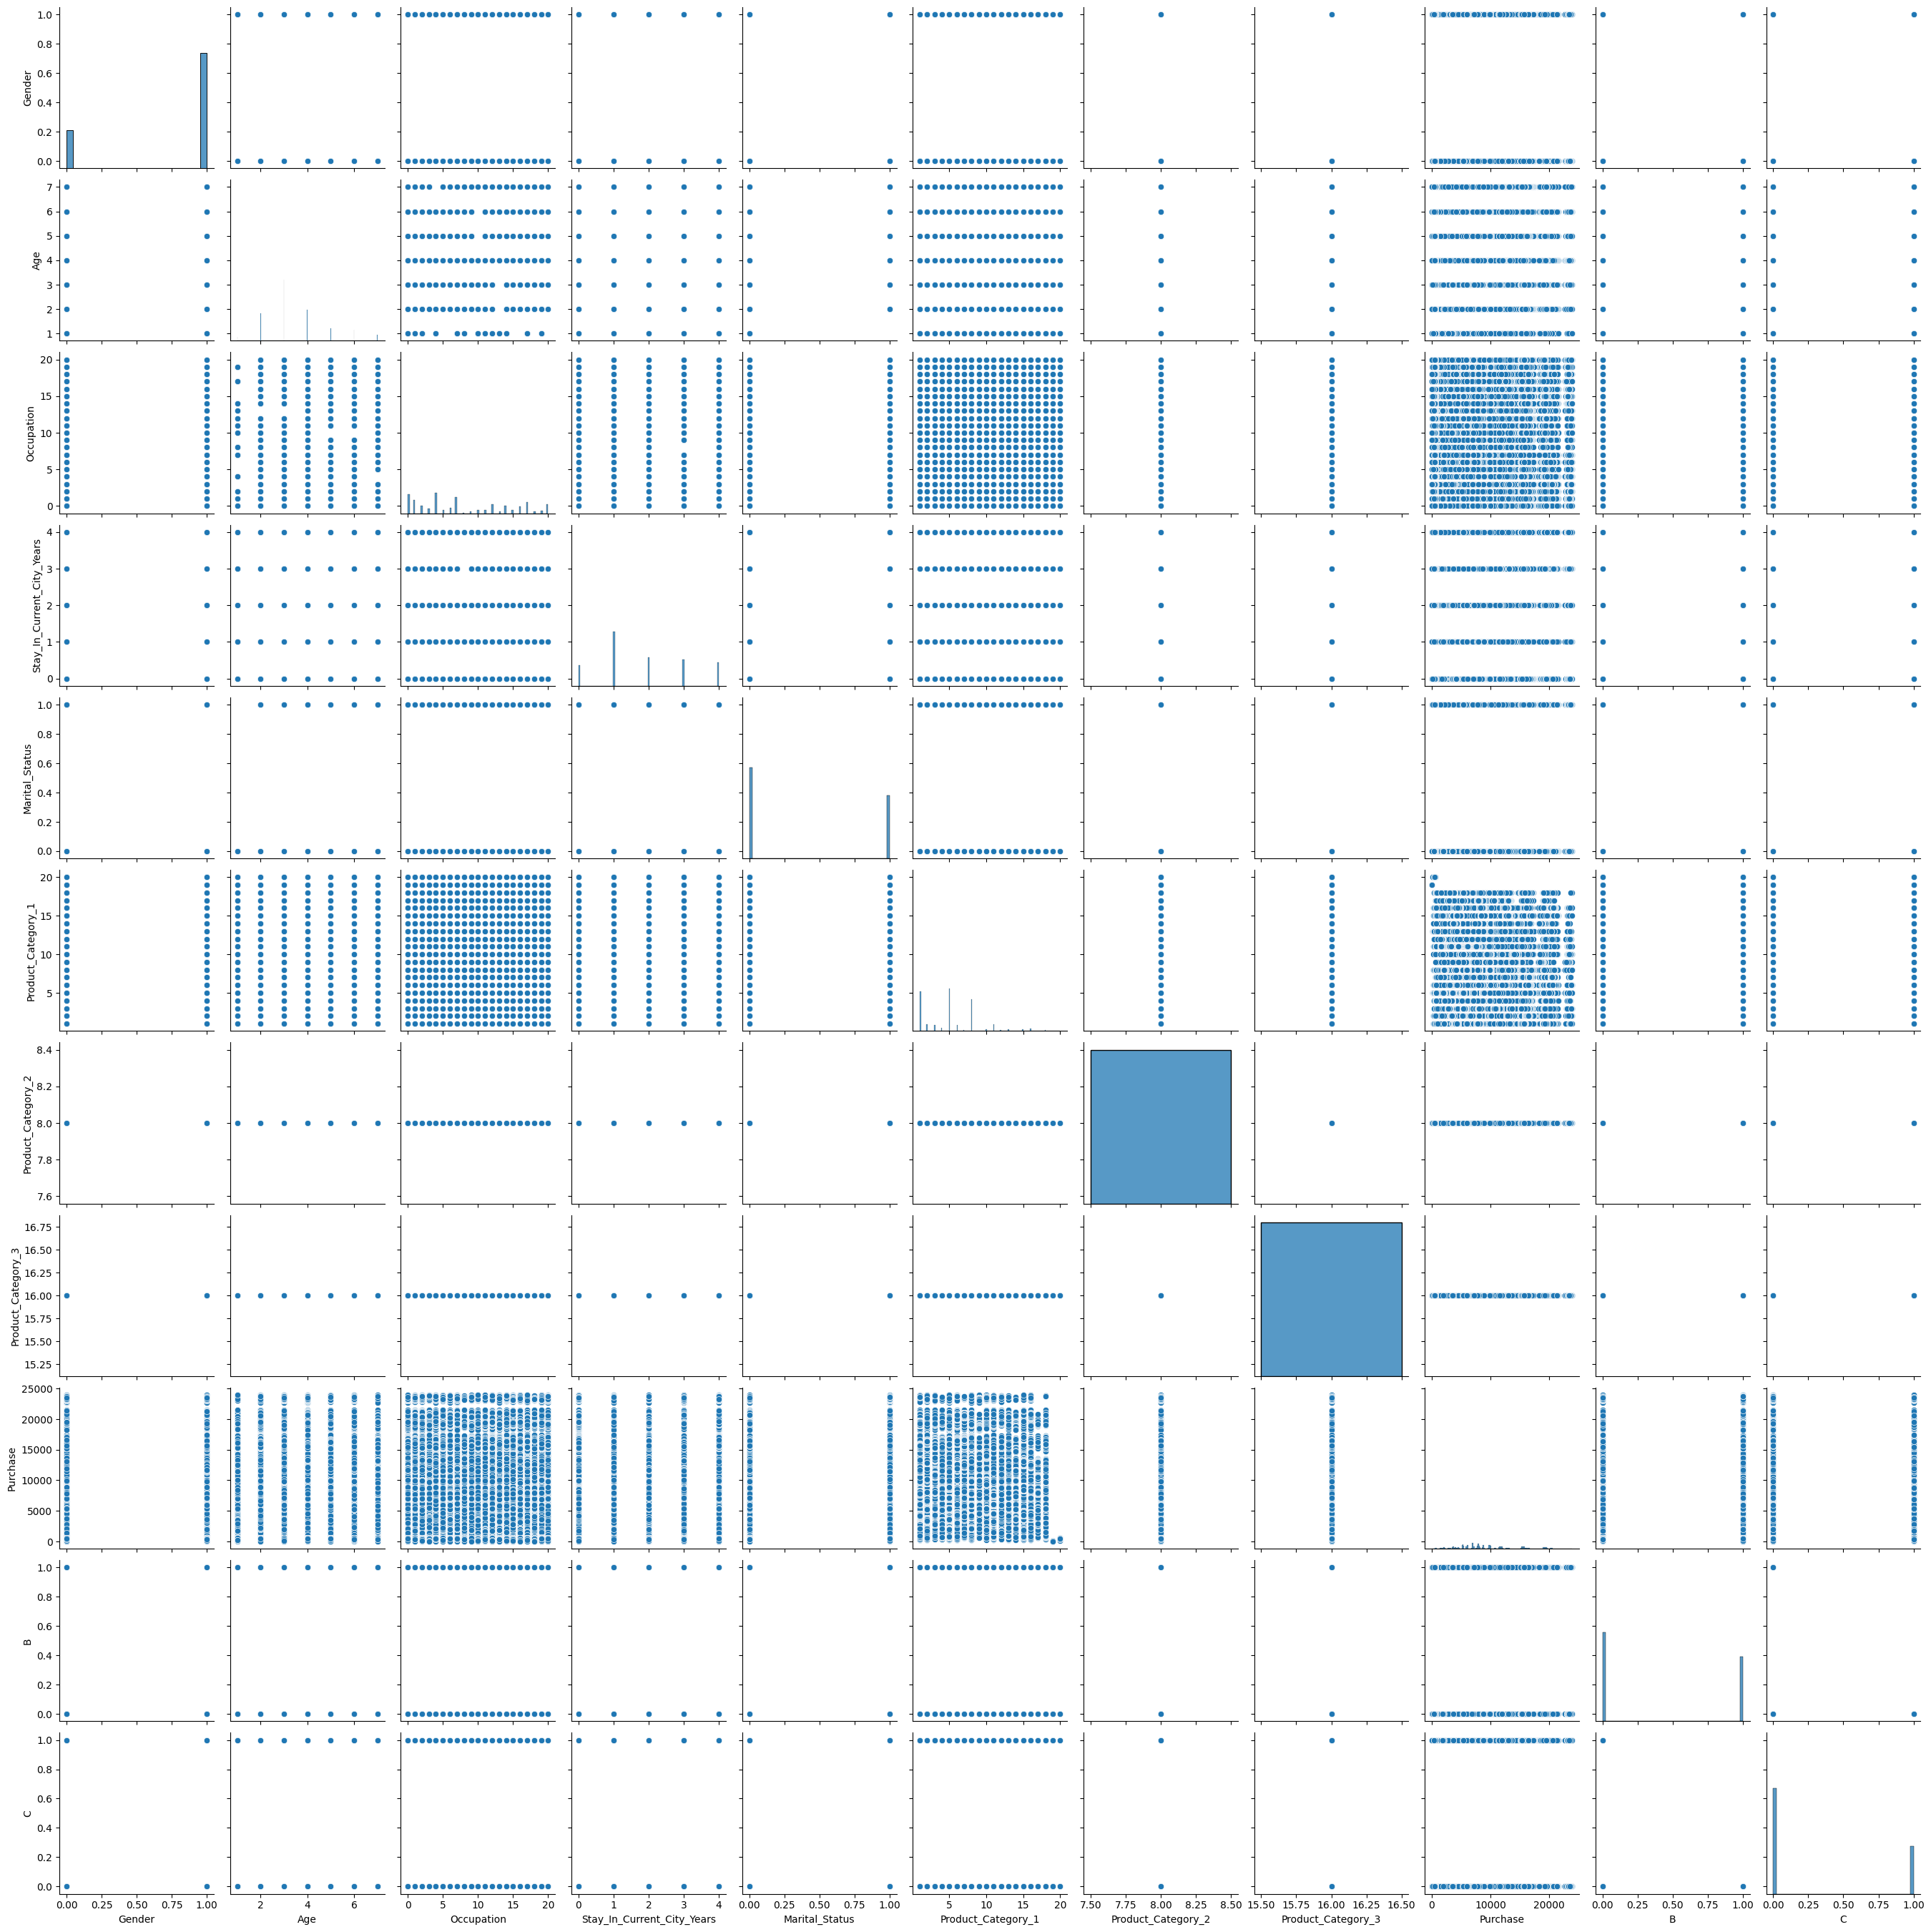

In [213]:
##Visualization
sns.pairplot(final_df)

In [214]:
sns.barplot('Age','Purchase',hue='Gender',data=final_df)

TypeError: barplot() got multiple values for argument 'data'

In [ ]:
##Visualization of purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=final_df)

In [ ]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)


In [ ]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

In [ ]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [215]:
df_test=final_df[final_df['Purchase'].isnull()]

In [216]:
df_train=final_df[final_df['Purchase'].isnull()]

In [224]:
X=df_train.drop('Purchase',axis=1)

In [225]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,8.0,16.0,1,0
1,P00113442,1,3,17,0,0,3,8.0,16.0,0,1
2,P00288442,0,4,1,4,1,5,8.0,16.0,1,0
3,P00145342,0,4,1,4,1,4,8.0,16.0,1,0
4,P00053842,0,3,1,1,0,4,8.0,16.0,0,1


In [226]:
y=df_train['Purchase']

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [237]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [238]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
